In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
# Ensure all elements in 'Bigram Occurrence Counts' are parsed as lists of floats
def to_float_list(x):
    if isinstance(x, str):  # Check if the value is a string
        x = ast.literal_eval(x)  # Safely evaluate the string to a Python object
    return [float(i) for i in x]


In [3]:
frequency_data = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/figures/bigram_guslatho_allcounts.csv')
#show values of frequency_data where Bigram Occurrence Counts is an empty list
empty_bigram_occurrence_counts = frequency_data[frequency_data['Bigram Occurrence Counts'].apply(lambda x: ast.literal_eval(x) == [])]



In [4]:
frequency_data


,Word,n_syllables,Log10_Syllable_FREQcounts,Syllable_Zipfs,Min_Log10_FreqCount,Max_Log10_FreqCount,Mean_Log10_FreqCount,Min_Syll_Zipf,Bigrams,Bigram Occurrence Counts,Zipf
0,toen,1.0,"(4.680453364401369,)","(5.90738474893631,)",4.680453,4.680453,4.680453,5.907385,"['to', 'oe', 'en']","[2236591.0, 837795.0, 8542439.0]",6.032333
1,de,1.0,"(6.234172950952972,)","(7.461104335487914,)",6.234173,6.234173,6.234173,7.461104,['de'],[2559661.0],7.381291
2,barkeeper,3.0,"(3.9745116927373285, 3.177824971864682, 4.7107...","(5.20144307727227, 4.4047563563996235, 5.93769...",3.177825,4.710760,3.954366,4.404756,"['ba', 'ar', 'rk', 'ke', 'ee', 'ep', 'pe', 'er']","[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",3.622674
3,die,1.0,"(5.527754887527666,)","(6.754686272062608,)",5.527755,5.527755,5.527755,6.754686,"['di', 'ie']","[1050254.0, 2076673.0]",6.853871
4,irritante,4.0,"(3.0461047872460387, 4.870825118775824, 4.0058...","(4.27303617178098, 6.097756503310765, 5.232755...",3.046105,5.910039,4.458198,4.273036,"['ir', 'rr', 'ri', 'it', 'ta', 'an', 'nt', 'te']","[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",3.284921
...,...,...,...,...,...,...,...,...,...,...,...
1936,blije,2.0,"(4.573869100848107, 5.300412859229037)","(5.800800485383048, 6.527344243763977)",4.573869,5.300413,4.937141,5.800800,"['bl', 'li', 'ij', 'je']","[152155.0, 3369152.0, 1639122.0, 913788.0]",3.485836
1937,jongeren,3.0,"(4.668600215163262, 6.125745990776331, 5.48281...","(5.895531599698203, 7.352677375311273, 6.70975...",4.668600,6.125746,5.425722,5.895532,"['jo', 'on', 'ng', 'ge', 'er', 're', 'en']","[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",3.965097
1938,intens,2.0,"(5.704650611569667, 2.92272545799326)","(6.931581996104608, 4.149656842528201)",2.922725,5.704651,4.313688,4.149657,"['in', 'nt', 'te', 'en', 'ns']","[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",3.778748
1939,plezier,2.0,"(3.953807997665307, 3.788521887222473)","(5.180739382200248, 5.015453271757414)",3.788522,3.953808,3.871165,5.015453,"['pl', 'le', 'ez', 'zi', 'ie', 'er']","[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",5.093966


In [7]:
syllable_frequencies_list = []  # Initialize an empty list to store all syllable frequencies for each row

for _, row in frequency_data.iterrows():
    word_parts = row['Syllables']
    syllable_frequencies = []  # Initialize an empty list to store frequencies for the current row
    if isinstance(word_parts, str):
        word_parts = word_parts.split(' - ')
        for part in word_parts:
            syllable_freq = syllable_freq_data[syllable_freq_data['Syllables'] == part]['Cumulative FREQcount'].values
            if syllable_freq.size > 0:
                syllable_frequencies.append(syllable_freq[0])
            else:
                syllable_frequencies.append(np.nan)
    syllable_frequencies_list.append(syllable_frequencies)  # Append the list for the current row

# Assign the list of lists to a new column in the DataFrame
frequency_data['Syllable_Frequencies_List'] = syllable_frequencies_list

In [8]:
frequency_data[['Word', 'Syllables', 'Syllable_Frequencies_List','Syllable Count']]

,Word,Syllables,Syllable_Frequencies_List,Syllable Count
0,toen,tun,[177],1
1,de,də,[208410],1
2,barkeeper,bɑr - keː - pər,"[1201, 18247, 22550]",3
3,die,di,[441857],1
4,irritante,ɪɾ - ri - tɑn - tə,"[8, 52221, 1202, 995799]",4
...,...,...,...,...
1937,blije,blɛɪ - ə,"[1796, 2281166]",2
1938,jongeren,jɔŋ - ə - rən,"[46187, 2281166, 6659]",3
1939,intens,ɪn - təns,"[214096, 575]",2
1940,plezier,pleː - zir,"[1573, 6109]",2


In [9]:
frequency_data['Min_Syllable_Location'] = np.nan  # Initialize the new column with NaN values
#for each row in frequency_data, find the minimum syllable frequency and its index
for index, row in frequency_data.iterrows():
    syllable_frequencies = row['Syllable_Frequencies_List']
    if isinstance(syllable_frequencies, list) and syllable_frequencies:
        min_freq = min(syllable_frequencies)
        min_index = syllable_frequencies.index(min_freq)
        frequency_data.at[index, 'Min_Syllable_Location'] = min_index + 1  # +1 for 1-based index
    else:
        frequency_data.at[index, 'Min_Syllable_Location'] = np.nan

In [10]:
frequency_data[['Word', 'Syllables', 'Syllable_Frequencies_List','Syllable Count','Min_Syllable_Location']]

,Word,Syllables,Syllable_Frequencies_List,Syllable Count,Min_Syllable_Location
0,toen,tun,[177],1,1.0
1,de,də,[208410],1,1.0
2,barkeeper,bɑr - keː - pər,"[1201, 18247, 22550]",3,1.0
3,die,di,[441857],1,1.0
4,irritante,ɪɾ - ri - tɑn - tə,"[8, 52221, 1202, 995799]",4,1.0
...,...,...,...,...,...
1937,blije,blɛɪ - ə,"[1796, 2281166]",2,1.0
1938,jongeren,jɔŋ - ə - rən,"[46187, 2281166, 6659]",3,3.0
1939,intens,ɪn - təns,"[214096, 575]",2,2.0
1940,plezier,pleː - zir,"[1573, 6109]",2,1.0


In [11]:
np.mean(frequency_data['Min_Syllable_Location'].dropna()) 

1.5884816753926703

<Axes: >

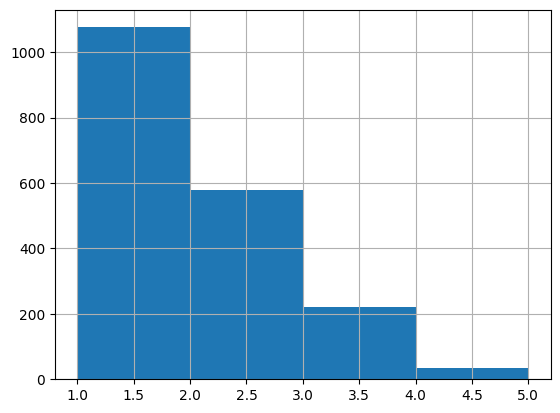

In [12]:
# Histogram of Min_Syllable_Location with integer bins
bin_edges = [1, 2, 3, 4, 5]  # Define bin edges to represent 1-2, 2-3, etc.
frequency_data['Min_Syllable_Location'].dropna().hist(bins=bin_edges,range=(1, 5))


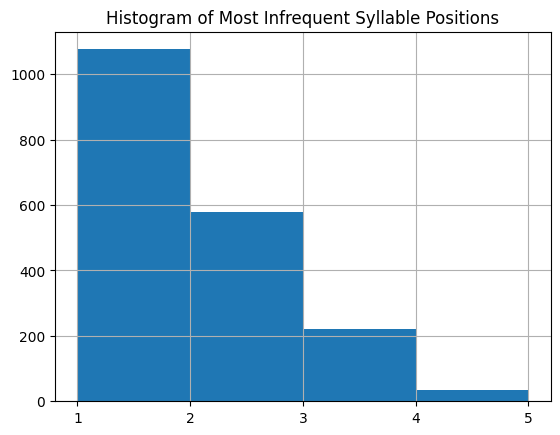

In [13]:
import matplotlib.pyplot as plt

# Histogram of Min_Syllable_Location with integer bins
bin_edges = [1, 2, 3, 4, 5]  # Define bin edges to represent 1-2, 2-3, etc.
ax = frequency_data['Min_Syllable_Location'].dropna().hist(bins=bin_edges, range=(1, 5))

# Set x-axis ticks to integers only
ax.set_xticks(range(1, 6))  # Set ticks to integers from 1 to 5
plt.title('Histogram of Most Infrequent Syllable Positions')
plt.show()

In [14]:
frequency_data

,Word,IPA,Syllables,Min_Freq_Count,Max_Freq_Count,Mean_Freq_Count,Bigrams,Bigram Occurrence Counts,Zipf,FREQcount,...,Min_BG_Freq_Count,Max_BG_Freq_Count,Mean_BG_Freq_Count,Log10_Min_BG_Freq,Log10_Max_BG_Freq,Log10_Mean_BG_Freq,Number of Letters,Syllable Count,Syllable_Frequencies_List,Min_Syllable_Location
0,toen,tˈun,tun,177.0,177.0,1.770000e+02,"['to', 'oe', 'en']","[2236591.0, 837795.0, 8542439.0]",6.032333,47514.0,...,837795.0,8542439.0,3.872275e+06,5.923138,6.931582,6.587966,4,1,[177],1.0
1,de,dˈə,də,208410.0,208410.0,2.084100e+05,['de'],[2559661.0],7.381291,1061177.0,...,2559661.0,2559661.0,2.559661e+06,6.408182,6.408182,6.408182,2,1,[208410],1.0
2,barkeeper,bˈɑrkeːpər,bɑr - keː - pər,1201.0,22550.0,1.399933e+04,"['ba', 'ar', 'rk', 'ke', 'ee', 'ep', 'pe', 'er']","[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",3.622674,184.0,...,189025.0,6799370.0,2.081522e+06,5.276519,6.832469,6.318381,9,3,"[1201, 18247, 22550]",1.0
3,die,dˈi,di,441857.0,441857.0,4.418570e+05,"['di', 'ie']","[1050254.0, 2076673.0]",6.853871,315041.0,...,1050254.0,2076673.0,1.563464e+06,6.021294,6.317368,6.194088,3,1,[441857],1.0
4,irritante,ˌɪɾritˈɑntə,ɪɾ - ri - tɑn - tə,8.0,995799.0,2.623075e+05,"['ir', 'rr', 'ri', 'it', 'ta', 'an', 'nt', 'te']","[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",3.284921,84.0,...,200692.0,4143386.0,1.905164e+06,5.302530,6.617355,6.279932,9,4,"[8, 52221, 1202, 995799]",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1937,blije,blˈɛɪə,blɛɪ - ə,1796.0,2281166.0,1.141481e+06,"['bl', 'li', 'ij', 'je']","[152155.0, 3369152.0, 1639122.0, 913788.0]",3.485836,134.0,...,152155.0,3369152.0,1.518554e+06,5.182286,6.527521,6.181430,5,2,"[1796, 2281166]",1.0
1938,jongeren,jˈɔŋərən,jɔŋ - ə - rən,6659.0,2281166.0,7.780040e+05,"['jo', 'on', 'ng', 'ge', 'er', 're', 'en']","[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",3.965097,406.0,...,866375.0,8542439.0,3.841034e+06,5.937706,6.931582,6.584448,8,3,"[46187, 2281166, 6659]",3.0
1939,intens,ˈɪntəns,ɪn - təns,575.0,214096.0,1.073355e+05,"['in', 'nt', 'te', 'en', 'ns']","[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",3.778748,264.0,...,612425.0,8542439.0,3.283876e+06,5.787053,6.931582,6.516387,6,2,"[214096, 575]",2.0
1940,plezier,pleːzˈir,pleː - zir,1573.0,6109.0,3.841000e+03,"['pl', 'le', 'ez', 'zi', 'ie', 'er']","[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",5.093966,5475.0,...,97171.0,6799370.0,2.265934e+06,4.987537,6.832469,6.355247,7,2,"[1573, 6109]",1.0


In [19]:
import ast

frequency_data['Min_Bigram_Location'] = np.nan  # Initialize the new column with NaN values

for index, row in frequency_data.iterrows():
    bigram_frequencies = row['Bigram Occurrence Counts']
    if isinstance(bigram_frequencies, str):  # If it's a string, parse it into a list
        bigram_frequencies = ast.literal_eval(bigram_frequencies)
    if isinstance(bigram_frequencies, list):  # Ensure it's a list
        min_freq = min(bigram_frequencies)
        min_index = bigram_frequencies.index(min_freq)
        frequency_data.at[index, 'Min_Bigram_Location'] = min_index + 1  # +1 for 1-based index
    else:
        frequency_data.at[index, 'Min_Bigram_Location'] = np.nan

In [20]:
frequency_data[['Word', 'Bigram Occurrence Counts', 'Min_Bigram_Location']]

,Word,Bigram Occurrence Counts,Min_Bigram_Location
0,toen,"[2236591.0, 837795.0, 8542439.0]",2.0
1,de,[2559661.0],1.0
2,barkeeper,"[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",6.0
3,die,"[1050254.0, 2076673.0]",1.0
4,irritante,"[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",2.0
...,...,...,...
1937,blije,"[152155.0, 3369152.0, 1639122.0, 913788.0]",1.0
1938,jongeren,"[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",1.0
1939,intens,"[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",5.0
1940,plezier,"[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",1.0


In [22]:
#max number of bigrams
max_bigrams = frequency_data['Bigram Occurrence Counts'].apply(lambda x: len(ast.literal_eval(x)) if isinstance(x, str) else 0).max()
max_bigrams

13

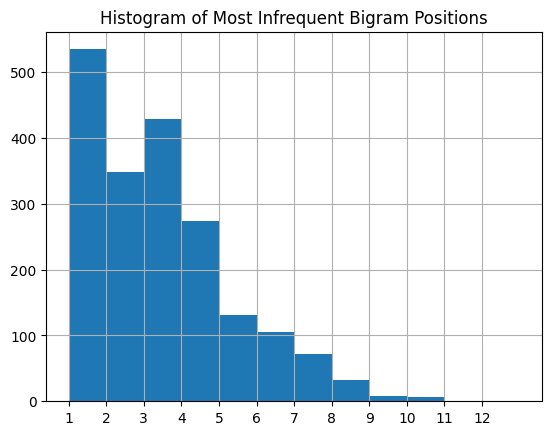

In [ ]:
import matplotlib.pyplot as plt

# Histogram of Min_Syllable_Location with integer bins
bin_edges = [1,2,3,4,5,6,7,8,9,10,11,12,13]  # Define bin edges to represent 1-2, 2-3, etc.
ax = frequency_data['Min_Bigram_Location'].dropna().hist(bins=bin_edges, range=(1, 5))

# Set x-axis ticks to integers only
ax.set_xticks(range(1, 13))  # Set ticks to integers from 1 to 13
plt.title('Histogram of Most Infrequent Bigram Positions')
plt.show()